In [1]:
# import relevant modules and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Understanding and Preparation

To get started with Exploratory Data Analysis(EDA), the data would have to be cleaned and transformed. This step has been performed and steps and directions can be found in the 'clean.ipynb' notebook.

Now, the data is loaded and exploration commences.

In [2]:
df = pd.read_csv('cleaned_houses.csv')

In [3]:
# take a look at shape and first 10 rows
print(f'Shape: {df.shape}')
df.head(10)

Shape: (19074, 9)


,Beds,Baths,Toilets,Is_new,Is_furnished,Is_serviced,Price,Property_type,Location
0,4.0,5.0,5.0,yes,yes,yes,85000000.0,house,Eti-Osa
1,5.0,6.0,6.0,yes,yes,no,160000000.0,house,Eti-Osa
2,4.0,5.0,5.0,yes,yes,no,68000000.0,house,Eti-Osa
3,5.0,6.0,6.0,yes,no,no,290000000.0,house,Eti-Osa
4,3.0,4.0,4.0,yes,yes,no,150000000.0,house,Eti-Osa
5,3.0,4.0,4.0,yes,no,yes,85000000.0,house,Eti-Osa
6,2.0,2.0,3.0,yes,no,yes,70000000.0,house,Eti-Osa
7,2.0,3.0,3.0,yes,no,yes,180000000.0,house,Eti-Osa
8,5.0,6.0,6.0,no,no,no,195000000.0,house,Eti-Osa
9,5.0,6.0,6.0,yes,no,no,550000000.0,house,Eti-Osa


## Feature Understanding

Take a look at the data types of each feature to be sure 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19074 entries, 0 to 19073
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Beds           19074 non-null  float64
 1   Baths          19074 non-null  float64
 2   Toilets        19074 non-null  float64
 3   Is_new         19074 non-null  object 
 4   Is_furnished   19074 non-null  object 
 5   Is_serviced    19074 non-null  object 
 6   Price          19074 non-null  float64
 7   Property_type  19074 non-null  object 
 8   Location       19074 non-null  object 
dtypes: float64(4), object(5)
memory usage: 1.3+ MB


As can be seen, there are 9 features, 5 are qualitative(categorical) and 4 are quantitative(continuous or discrete). The aim of this section is to use descriptive statistics to summarize each feature. As an example the price faeature, to know things  like,the average price(mean price), the median price, are these two measures the same, why are they not the same, is the data skewed, how skewed, are there outliers. For categorical variables, to know which property type occurs most, what the average price is for each property type 

### The Price Feature

In [5]:
# the mean price
mean = df['Price'].mean()
print(f'Mean = {mean}')

Mean = 1319307016.060501


This shows the mean price to be a billion Naira. At this point, check the median.

In [6]:
# the median price
median = df['Price'].median()
print(f'Median = {median}')

Median = 110000000.0


So the median price appears much lower than the mean price. Check the maximum and minimum price

In [7]:
max = df['Price'].max()
min = df['Price'].min()
print(f'Max = {max}')
print(f'Min = {min}')

Max = 3487500000000.0
Min = 0.0


Two things of note here, one the record without a price must be removed and two, the maximum price is in the trillions and that appears extremely suspicious. Next check kurtosis and skewness then plot a histogram.

In [8]:
kurtosis = df['Price'].kurt()
skew = df['Price'].skew()
print(f'Kurtosis = {kurtosis}')
print(f'Skew = {skew}')

Kurtosis = 3394.6806958154543
Skew = 53.81723664659797


The skew is a positive number so that explains the mean being so much larger than the median, this distribution is positively skewed. The Kurtosis figure means the distribution is leptokurtic and there are either a lot of outliers or an extremely large outlier

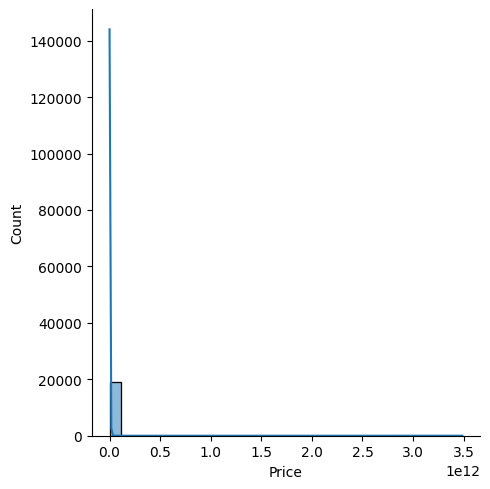

In [9]:
# check for outliers(histogram)
sns.displot(df['Price'], kde=True, bins=30);

<AxesSubplot: xlabel='Price'>

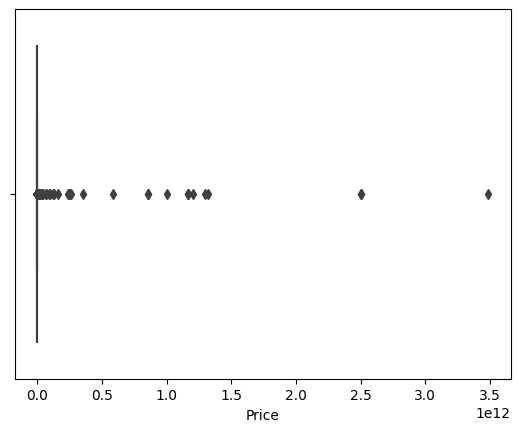

In [10]:
# check for outliers(boxplot)
sns.boxplot(x=df['Price'])

So the plots confirm the presence of outliers. Since the distribution is skewed and does not follow a normal distribution then the InterQuartile Range(IQR) will be used to detect outliers

In [11]:
# remove outliers
def find_outliers(df):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)

    iqr = q3-q1

    outliers = df[((df<(q1-1.5*iqr)) | (df>(q3+1.5*iqr)))]

    return outliers

In [12]:
price_outliers = find_outliers(df['Price'])

In [13]:
print(f'Number_of_outliers: {len(price_outliers)}')
print(f'Minimum outlier value: {price_outliers.min()}')
print(f'Maximum outlier value: {price_outliers.max()}')

Number_of_outliers: 1948
Minimum outlier value: 405000000.0
Maximum outlier value: 3487500000000.0


In [14]:
# price_outliers.index
price_outliers_df = df[df['Price'].isin(price_outliers.values)]

According to the data source the highest price for a house listed on their website is  is 1,000,000,000. So values over that figure would be considered outliers especially those in the hundreds of billions and trillions.

So, drop prices above 1,500,000,000.

In [15]:
# indices to be dropeed
price_outliers_drop = price_outliers_df[price_outliers_df['Price']>1500000000].index

In [16]:
# copy dataframe
df2 = df.copy()

In [17]:
df2.drop(price_outliers_drop, axis=0, inplace=True)

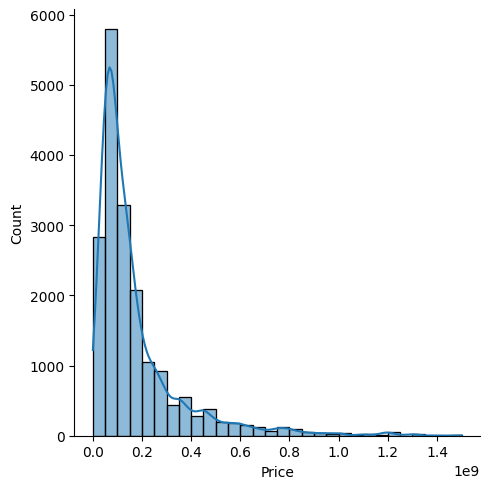

In [18]:
sns.displot(df2['Price'], kde=True, bins=30);

In [19]:
print(f'Kurt  {df2["Price"].kurt()}')
print(f'Skew  {df2["Price"].skew()}')
df2['Price'].describe()

Kurt  9.614236708677979
Skew  2.753632806018766


count    1.885000e+04
mean     1.723934e+08
std      1.866808e+08
min      0.000000e+00
25%      6.500000e+07
50%      1.100000e+08
75%      2.000000e+08
max      1.500000e+09
Name: Price, dtype: float64

Data is still pretty much skewed, but the max value represents something realistic, further transformations will be carried out later. Another thing is to drop values that have 0 in the price column. Alternatively they can be replaced with other values. Lets take a look:

In [20]:
# rows with 0 price 
df2[df2.Price == 0]

,Beds,Baths,Toilets,Is_new,Is_furnished,Is_serviced,Price,Property_type,Location
12357,4.0,4.0,5.0,no,no,no,0.0,house,Eti-Osa


In [21]:
df2.drop(df2[df2['Price'] == 0].index, axis=0, inplace=True)

### The Location Feature

In [22]:
# check unique location number
df2['Location'].value_counts()

Eti-Osa           13799
Ikeja              1507
Alimosho           1031
Kosofe              630
Epe                 300
Ifako-Ijaiye        267
Surulere            267
Ikorodu             263
Oshodi-Isolo        236
Lagos Mainland      230
Agege                90
Shomolu              84
Mushin               63
Amuwo-Odofin         59
Ojo                   9
Apapa                 7
Badagry               7
Name: Location, dtype: int64

So there are 17 different locations, these locations represent Local Government Area's in Lagos. Let's have a look at this visually:

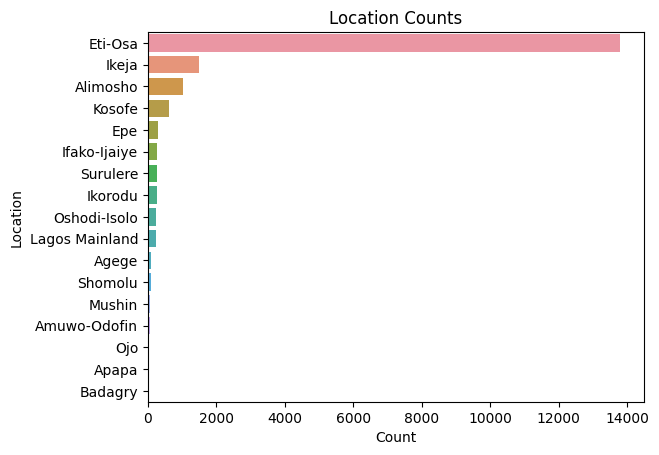

In [23]:
sns.barplot(x=df2['Location'].value_counts(), y=df2['Location'].value_counts().index, orient='h')
plt.xlabel('Count')
plt.ylabel('Location')
plt.title('Location Counts')
plt.show()


It can be seen that Eti-Osa is the most frequent location in the dataset

### The Property Type Feature

In [24]:
df2['Property_type'].value_counts()

house        16105
apartment     2744
Name: Property_type, dtype: int64

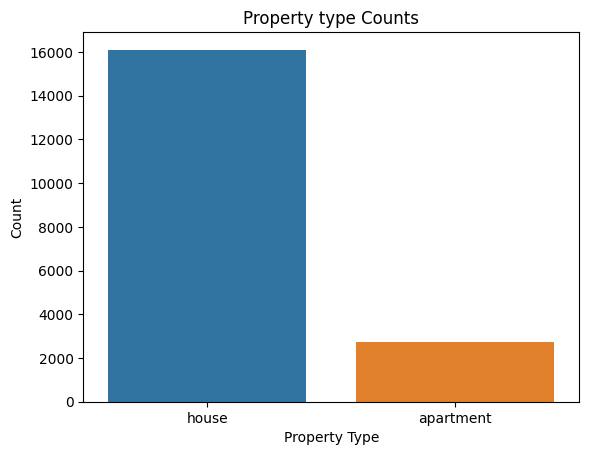

In [25]:
sns.barplot(x=df2['Property_type'].value_counts().index, y=df2['Property_type'].value_counts())
plt.xlabel('Property Type')
plt.ylabel('Count')
plt.title('Property type Counts')
plt.show()

There are a lot more houses up for sale than apartments.

### The Is New, Is Serviced, Is_furnsished features

These 3 features are all similar so look at them under one heading.

In [26]:
newness = df2['Is_new'].value_counts()

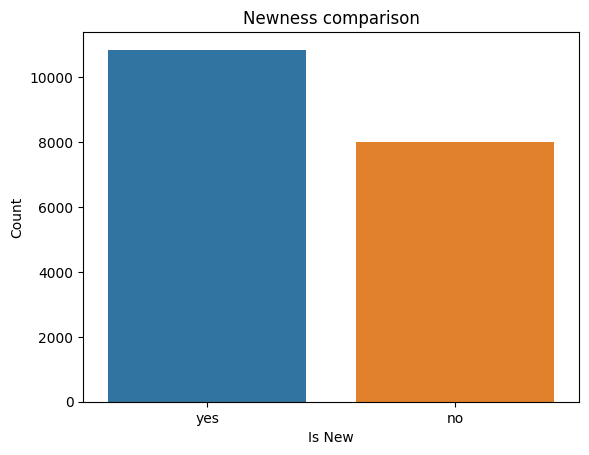

In [27]:
sns.barplot(x=newness.index, y=newness)
plt.xlabel('Is New')
plt.ylabel('Count')
plt.title('Newness comparison')
plt.show()

More properties are new

In [28]:
furnish = df2['Is_furnished'].value_counts()

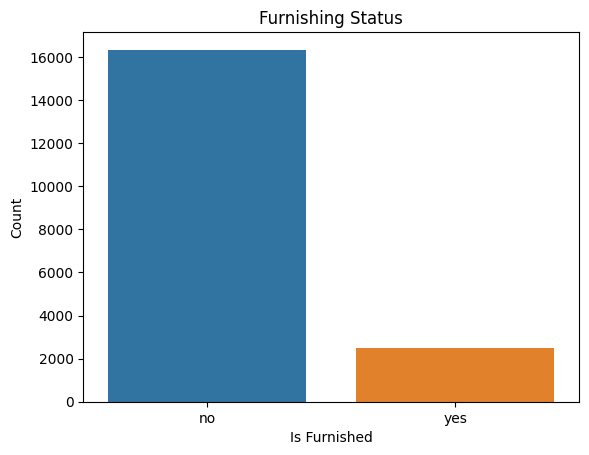

In [29]:
sns.barplot(x=furnish.index, y=furnish)
plt.xlabel('Is Furnished')
plt.ylabel('Count')
plt.title('Furnishing Status')
plt.show()

It appears a lot of properties come without furniture

In [30]:
serviced = df2['Is_serviced'].value_counts()

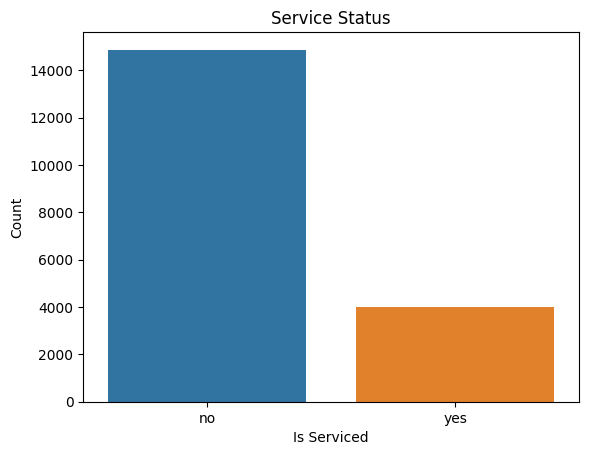

In [31]:
sns.barplot(x=serviced.index, y=serviced)
plt.xlabel('Is Serviced')
plt.ylabel('Count')
plt.title('Service Status')
plt.show()

A greater number of properties are not serviced.

## Feature Relationships

1.386446089008289
11828.437077964943
10488.088481701516


## Feature Engineering and Model Building